In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from prophet import Prophet
import itertools
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
#from keras.layers import Dropout
#from sklearn.preprocessing import MinMaxScaler
from fitter import Fitter
import math
from datetime import datetime as dt
from datetime import datetime, timedelta
from matplotlib.ticker import PercentFormatter

In [2]:
#!pip install fitter

In [3]:
!python --version

Python 3.10.9


In [4]:
df=pd.read_excel(r"C:\Users\ritvi\OneDrive\Desktop\ds_stuff\bdm_project\F13 to F20.xlsx",sheet_name="kwhF13")


In [5]:
df.head(103)

,Date,Comp.-1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Chassis,"Jost-1,PTC & Boiler",Jost-2,...,Tr.Light,Tool room/Comp. cooling,Short Blasting,"SQF 1,2,3",Admn block &\nCanteen,\nInd. Hard,Assy. Shop,Total Power Consumption,day,Unnamed: 29
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01.04.2012,0,259,0,2400.0,110.0,750,800.0,710.0,690.0,...,1380.0,1180.0,4050.0,3080.0,940.0,150.0,50.0,27648.0,NaN,NaN
2,02.04.2012,0,0,0,290.0,0,2230.0,120.0,940.0,60.0,...,1090.0,1230.0,3540.0,2770.0,430.0,190.0,50.0,17802.0,NaN,NaN
3,03.04.2012,0,0,31,1540.0,320.0,2290.0,4230.0,5690.0,1510.0,...,770.0,2910.0,3980.0,2960.0,910.0,560.0,830.0,41295,NaN,NaN
4,04.04.2012,0,0,0,1360.0,40.0,2430.0,4550.0,5570.0,1450.0,...,1530.0,2370.0,4880.0,4690.0,1140.0,370.0,990.0,44227.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,01.07.2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,Total,0,0,865,33910.0,3290.0,57990.0,106000,119000,36970.0,...,36480.0,58525.0,115790.0,74290.0,57380.0,17210.0,22950.0,1037536.0,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,Date,Comp.-1,Comp.-2,Comp.-3,Comp.-4,Comp.-5,Comp.-6,Chassis,"Jost-1,PTC,Boiler",Jost-2,...,Tr. Light,Tool room/Comp.cooling,S.Blasting,"SQF 1,2,3",Admn block\nCanteen,Ind.Harding,Assembly\nmachine,Total Power Consumption,NaN,NaN


In [6]:
dropper=[]
df.dropna(how="all",inplace=True)
df
df=df[["Date","Total Power Consumption"]].reset_index(drop=True)
for i in range(len(df)):
    if df.Date[i]=="Total" or df.Date[i]=="Date" or df.Date[i]=="Total Power consumption":
        dropper.append(i)
    elif all(math.isnan(j) for j in df.iloc[i,1:]):
        dropper.append(i)
df.drop(labels=dropper,inplace=True)
df.reset_index(inplace=True,drop=True)
df

,Date,Total Power Consumption
0,01.04.2012,27648.0
1,02.04.2012,17802.0
2,03.04.2012,41295
3,04.04.2012,44227.0
4,05.04.2012,43175.0
...,...,...
361,27.03.2013,13348.0
362,28.03.2013,28252.0
363,29.03.2013,35998.0
364,30.03.2013,13981.0


In [7]:
df.rename(columns={"Date":"ds","Total Power Consumption":"y"},inplace=True)


In [8]:
df_f=df.copy()

In [9]:
df=pd.read_excel(r"C:\Users\ritvi\OneDrive\Desktop\ds_stuff\bdm_project\F13 to F20.xlsx",sheet_name="KWH F14 and F15")
dropper=[]
df.dropna(how="all",inplace=True)
df=df[["Date","Total Consumption"]].reset_index(drop=True)
print(df[df.index>620])
for i in range(len(df)):
    if df.Date[i]=="Total" or df.Date[i]=="Date" or df.Date[i]=="TOTAL":
        dropper.append(i)
    elif all(math.isnan(j) for j in df.iloc[i,1:]):
        dropper.append(i)
df.drop(labels=dropper,inplace=True)
df.reset_index(inplace=True,drop=True)
df.rename(columns={"Date":"ds","Total Consumption":"y"},inplace=True)
df_f=pd.concat([df_f,df])
 

                    Date Total Consumption
621            4.11.2014           93699.0
622            5.11.2014           89842.0
623            6.11.2014           62670.0
624            7.11.2014           60129.0
625            8.11.2014          103008.0
..                   ...               ...
773  2015-03-28 00:00:00            6470.0
774  2015-03-29 00:00:00            4992.0
775  2015-03-30 00:00:00            9765.0
776  2015-03-31 00:00:00           16909.0
777                Total          814008.0

[157 rows x 2 columns]


In [10]:
for i in range(len(df_f)):
    print(df_f.iloc[i,:])

ds    01.04.2012
y        27648.0
Name: 0, dtype: object
ds    02.04.2012
y        17802.0
Name: 1, dtype: object
ds    03.04.2012
y          41295
Name: 2, dtype: object
ds    04.04.2012
y        44227.0
Name: 3, dtype: object
ds    05.04.2012
y        43175.0
Name: 4, dtype: object
ds    06.04.2012
y        44025.0
Name: 5, dtype: object
ds    07.04.2012
y        43330.0
Name: 6, dtype: object
ds    08.04.2012
y        41571.0
Name: 7, dtype: object
ds    09.04.2012
y        21996.0
Name: 8, dtype: object
ds    10.04.2012
y        47201.0
Name: 9, dtype: object
ds    11.04.2012
y        38121.0
Name: 10, dtype: object
ds    12.04.2012
y        42730.0
Name: 11, dtype: object
ds    13.04.2012
y        45156.0
Name: 12, dtype: object
ds    14.04.2012
y        18756.0
Name: 13, dtype: object
ds    15.04.2012
y        18867.0
Name: 14, dtype: object
ds    16.04.2012
y        41240.0
Name: 15, dtype: object
ds    17.04.2012
y        42773.0
Name: 16, dtype: object
ds    18.04.2012
y      

In [11]:


df=pd.read_excel(r"C:\Users\ritvi\OneDrive\Desktop\ds_stuff\bdm_project\F13 to F20.xlsx",sheet_name="KWH F16")
dropper=[]
df.dropna(how="all",inplace=True)
df=df[["Date","Total Consumption"]].reset_index(drop=True)
for i in range(len(df)):
    if df.Date[i]=="Total" or df.Date[i]=="Date" or df.Date[i]=="Total Consumption":
        dropper.append(i)
    elif all(math.isnan(j) for j in df.iloc[i,1:]):
        dropper.append(i)
df.drop(labels=dropper,inplace=True)
df.reset_index(inplace=True,drop=True)
df.rename(columns={"Date":"ds","Total Consumption":"y"},inplace=True)
df_f=pd.concat([df_f,df])



df=pd.read_excel(r"C:\Users\ritvi\OneDrive\Desktop\ds_stuff\bdm_project\F13 to F20.xlsx",sheet_name="KWH F17")
dropper=[]
#print(df.columns)
df.dropna(how="all",inplace=True)
#print(df.columns)
df=df[["Date","Total Consumption"]].reset_index(drop=True)
for i in range(len(df)):
    if df.Date[i]=="Total" or df.Date[i]=="Date" or df.Date[i]==" Total":
        dropper.append(i)
    elif all(math.isnan(j) for j in df.iloc[i,1:]):
        dropper.append(i)
df.drop(labels=dropper,inplace=True)
df.reset_index(inplace=True,drop=True)
df.rename(columns={"Date":"ds","Total Consumption":"y"},inplace=True)
df_f=pd.concat([df_f,df])


df=pd.read_excel(r"C:\Users\ritvi\OneDrive\Desktop\ds_stuff\bdm_project\F13 to F20.xlsx",sheet_name="KWH F18")
dropper=[]
df.dropna(how="all",inplace=True)
df=df[["Date","Total "]].reset_index(drop=True)
for i in range(len(df)):
    if df.Date[i]=="Total" or df.Date[i]=="Date" or df.Date[i]=="Total Power consumption":
        dropper.append(i)
    elif all(math.isnan(j) for j in df.iloc[i,1:]):
        dropper.append(i)
df.drop(labels=dropper,inplace=True)
df.reset_index(inplace=True,drop=True)
df.rename(columns={"Date":"ds","Total ":"y"},inplace=True)
df_f=pd.concat([df_f,df])



df=pd.read_excel(r"C:\Users\ritvi\OneDrive\Desktop\ds_stuff\bdm_project\F13 to F20.xlsx",sheet_name="KWH F19")
dropper=[]
df.dropna(how="all",inplace=True)
df=df[["Date","Total"]].reset_index(drop=True)
for i in range(len(df)):
    if df.Date[i]=="Total" or df.Date[i]=="Date" or df.Date[i]=="Total Power consumption":
        dropper.append(i)
    elif all(math.isnan(j) for j in df.iloc[i,1:]):
        dropper.append(i)
df.drop(labels=dropper,inplace=True)
df.reset_index(inplace=True,drop=True)
df.rename(columns={"Date":"ds","Total":"y"},inplace=True)
df_f=pd.concat([df_f,df])


df=pd.read_excel(r"C:\Users\ritvi\OneDrive\Desktop\ds_stuff\bdm_project\F13 to F20.xlsx",sheet_name="KWH F20")
dropper=[]
df.dropna(how="all",inplace=True)
df=df[["Date","Total "]].reset_index(drop=True)
for i in range(len(df)):
    if df.Date[i]=="Total" or df.Date[i]=="Date" or df.Date[i]=="Total Power consumption":
        dropper.append(i)
    elif all(math.isnan(j) for j in df.iloc[i,1:]):
        dropper.append(i)
df.drop(labels=dropper,inplace=True)
df.reset_index(inplace=True,drop=True)
df.rename(columns={"Date":"ds","Total ":"y"},inplace=True)
df_f=pd.concat([df_f,df])




df_f

,ds,y
0,01.04.2012,27648.0
1,02.04.2012,17802.0
2,03.04.2012,41295
3,04.04.2012,44227.0
4,05.04.2012,43175.0
...,...,...
378,2020-03-28 00:00:00,4785.0
379,2020-03-29 00:00:00,7738.0
380,2020-03-30 00:00:00,6195.0
381,2020-03-31 00:00:00,1589.0


In [12]:
df=pd.read_excel(r"C:\Users\ritvi\OneDrive\Desktop\ds_stuff\bdm_project\F-21.xlsx",sheet_name="shopwise consumption")
dropper=[]
df.dropna(how="all",inplace=True)
df=df[["Date","Total "]].reset_index(drop=True)
for i in range(len(df)):
    if df.Date[i]=="Online" or df.Date[i]=="Difference" or df.Date[i]=="Total":
        dropper.append(i)
    elif all(math.isnan(j) for j in df.iloc[i,1:]):
        dropper.append(i)
df.drop(labels=dropper,inplace=True)
df.reset_index(inplace=True,drop=True)
df.rename(columns={"Date":"ds","Total ":"y"},inplace=True)
df_f=pd.concat([df_f,df])


df=pd.read_excel(r"C:\Users\ritvi\OneDrive\Desktop\ds_stuff\bdm_project\F-22.xlsx",sheet_name="shopwise consumption")
dropper=[]
df.dropna(how="all",inplace=True)
df=df[["Date","Total "]].reset_index(drop=True)
for i in range(len(df)):
    if df.Date[i]=="Total" or df.Date[i]=="Date" or df.Date[i]=="Total Power consumption":
        dropper.append(i)
    elif all(math.isnan(j) for j in df.iloc[i,1:]):
        dropper.append(i)
df.drop(labels=dropper,inplace=True)
df.reset_index(inplace=True,drop=True)
df.rename(columns={"Date":"ds","Total ":"y"},inplace=True)
df_f=pd.concat([df_f,df])


df=pd.read_excel(r"C:\Users\ritvi\OneDrive\Desktop\ds_stuff\bdm_project\F-23.xlsx",sheet_name="shopwise consumption")
dropper=[]
df.dropna(how="all",inplace=True)
df=df[["Date","Total "]].reset_index(drop=True)
for i in range(len(df)):
    if df.Date[i]=="Total" or df.Date[i]=="Date" or df.Date[i]=="Total Power consumption":
        dropper.append(i)
    elif all(math.isnan(j) for j in df.iloc[i,1:]):
        dropper.append(i)
df.drop(labels=dropper,inplace=True)
df.reset_index(inplace=True,drop=True)
df.rename(columns={"Date":"ds","Total ":"y"},inplace=True)


df_f=pd.concat([df_f,df])

In [13]:
df_f=df_f.reset_index(drop=True)


In [14]:
df_f=df_f[:-12]

In [15]:
dropper=[]
for i in range(len(df_f)):
    if (df_f.y[i]==0):
        dropper.append(i)
df_f.drop(labels=dropper,inplace=True)
df_f.reset_index(drop=True,inplace=True)

In [16]:
df_f.dropna(inplace=True)
df_f.reset_index(drop=True,inplace=True)
df_f.isna().sum()

ds    0
y     0
dtype: int64

In [17]:
for i in range(len(df_f)):
    if isinstance(df_f.ds[i],str):        
        #print(df_f.iloc[i-1,:])
        df_f.ds[i]=dt.strptime(df_f.ds[i],'%d.%m.%Y')
#        print(df_f.ds[i])
    else:
#        print(df_f.ds[i])
        df_f["ds"][i]=df_f["ds"][i].strftime("%Y-%m-%d")

In [18]:
dropper=[]
for i in range(len(df_f)):
    if (df_f.y[i]<0):
        dropper.append(i)
df_f.drop(labels=dropper,inplace=True)
df_f.reset_index(drop=True,inplace=True)

In [19]:
for i in range(len(df_f)-3):
    print(df_f.iloc[i,:])

ds    2012-04-01 00:00:00
y                 27648.0
Name: 0, dtype: object
ds    2012-04-02 00:00:00
y                 17802.0
Name: 1, dtype: object
ds    2012-04-03 00:00:00
y                   41295
Name: 2, dtype: object
ds    2012-04-04 00:00:00
y                 44227.0
Name: 3, dtype: object
ds    2012-04-05 00:00:00
y                 43175.0
Name: 4, dtype: object
ds    2012-04-06 00:00:00
y                 44025.0
Name: 5, dtype: object
ds    2012-04-07 00:00:00
y                 43330.0
Name: 6, dtype: object
ds    2012-04-08 00:00:00
y                 41571.0
Name: 7, dtype: object
ds    2012-04-09 00:00:00
y                 21996.0
Name: 8, dtype: object
ds    2012-04-10 00:00:00
y                 47201.0
Name: 9, dtype: object
ds    2012-04-11 00:00:00
y                 38121.0
Name: 10, dtype: object
ds    2012-04-12 00:00:00
y                 42730.0
Name: 11, dtype: object
ds    2012-04-13 00:00:00
y                 45156.0
Name: 12, dtype: object
ds    2012-04-14 00:00

In [20]:
df_f_train=df_f.iloc[:-15,:]
df_f_test=df_f.iloc[-15:,:]
df_f_test.reset_index(drop=True,inplace=True)
for i in range(len(df_f_train)):
    if df_f_train.y[i]>100000:# or df_f_train.y[i]<1000:
        #print(df_f_train.iloc[i,:])
        df_f_train.drop(labels=[i],inplace=True)
df_f_train.reset_index(drop=True,inplace=True)

for i in range(len(df_f_test)):
    if df_f_test.y[i]<1000:
        df_f_test.drop(labels=[i],inplace=True)
df_f_test.reset_index(drop=True,inplace=True)


C:\Users\ritvi\AppData\Local\Temp\ipykernel_12616\2277416553.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f_train.drop(labels=[i],inplace=True)
C:\Users\ritvi\AppData\Local\Temp\ipykernel_12616\2277416553.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f_train.drop(labels=[i],inplace=True)
C:\Users\ritvi\AppData\Local\Temp\ipykernel_12616\2277416553.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f_train.drop(la

In [21]:
sun=[]
sunfun=[]
def allsundays(year):
    return pd.date_range(start=str(year), end=str(year+1), 
                         freq='W-SUN').strftime('%m/%d/%Y').tolist()
for i in range(2012,2024,1):
    sun.append(allsundays(i)[:])
for i in sun:
    for j in i:
        sunfun.append(j)
sunfun

['01/01/2012',
 '01/08/2012',
 '01/15/2012',
 '01/22/2012',
 '01/29/2012',
 '02/05/2012',
 '02/12/2012',
 '02/19/2012',
 '02/26/2012',
 '03/04/2012',
 '03/11/2012',
 '03/18/2012',
 '03/25/2012',
 '04/01/2012',
 '04/08/2012',
 '04/15/2012',
 '04/22/2012',
 '04/29/2012',
 '05/06/2012',
 '05/13/2012',
 '05/20/2012',
 '05/27/2012',
 '06/03/2012',
 '06/10/2012',
 '06/17/2012',
 '06/24/2012',
 '07/01/2012',
 '07/08/2012',
 '07/15/2012',
 '07/22/2012',
 '07/29/2012',
 '08/05/2012',
 '08/12/2012',
 '08/19/2012',
 '08/26/2012',
 '09/02/2012',
 '09/09/2012',
 '09/16/2012',
 '09/23/2012',
 '09/30/2012',
 '10/07/2012',
 '10/14/2012',
 '10/21/2012',
 '10/28/2012',
 '11/04/2012',
 '11/11/2012',
 '11/18/2012',
 '11/25/2012',
 '12/02/2012',
 '12/09/2012',
 '12/16/2012',
 '12/23/2012',
 '12/30/2012',
 '01/06/2013',
 '01/13/2013',
 '01/20/2013',
 '01/27/2013',
 '02/03/2013',
 '02/10/2013',
 '02/17/2013',
 '02/24/2013',
 '03/03/2013',
 '03/10/2013',
 '03/17/2013',
 '03/24/2013',
 '03/31/2013',
 '04/07/20

In [22]:
from datetime import date, timedelta

start_dt = date(2020, 3, 21)
end_dt = date(2021, 9, 26)

# difference between current and previous date
delta = timedelta(days=1)

# store the dates between two dates in a list
dates = []

while start_dt <= end_dt:
    # add current date to list by converting  it to iso format
    dates.append(start_dt.isoformat())
    # increment start date by timedelta
    start_dt += delta

print('Dates between', start_dt, 'and', end_dt)
#print(dates)

Dates between 2021-09-27 and 2021-09-26


In [23]:


start_dt = date(2021, 5, 11)
end_dt = date(2021, 10, 8)

# difference between current and previous date
delta = timedelta(days=1)

# store the dates between two dates in a list
dates2 = []

while start_dt <= end_dt:
    # add current date to list by converting  it to iso format
    dates2.append(start_dt.isoformat())
    # increment start date by timedelta
    start_dt += delta

print('Dates between', start_dt, 'and', end_dt)

Dates between 2021-10-09 and 2021-10-08


In [25]:

gh = pd.DataFrame({
  'holiday': 'gazetted',
  'ds': pd.to_datetime(['2012-04-14','2012-04-15','2012-08-15','2012-10-02','2012-10-24','2012-10-13','2012-10-14','2012-11-28','2012-12-25','2013-01-26','2013-04-13','2013-04-19','2013-08-15','2013-08-28','2013-10-02','2013-02-13','2013-11-03','2013-11-04','2013-11-17','2013-12-25','2014-01-26','2014-03-17','2014-04-13','2014-08-15','2014-10-02','2014-11-06','2014-12-25','2015-01-26','2015-03-06','2015-08-15','2015-10-02','2015-10-22','2015-11-25','2015-12-25','2016-01-26','2016-03-07','2016-03-25','2016-04-14','2016-08-15','2016-10-02','2016-10-11','2016-11-14','2016-12-25','2017-01-05','2017-01-26','2017-02-24','2017-03-13','2017-04-13','2017-08-15','2017-09-30','2017-10-02','2017-10-19','2017-10-20','2017-11-04','2017-12-25','2018-01-26','2018-03-02','2018-04-14','2018-08-15','2018-03-09','2018-10-02','2018-10-19','2018-11-07','2018-11-08','2018-11-23','2018-12-25','2019-01-26','2019-03-04','2019-03-21','2019-04-13','2019-06-05','2019-08-15','2019-10-02','2019-10-08','2019-10-13','2019-10-20','2019-10-28','2019-10-08','2019-11-12','2019-12-15','2020-01-02','2020-01-26','2020-02-21','2020-03-10','2020-04-13','2020-08-15','2020-02-10','2020-10-25','2020-11-14','2020-11-15','2020-11-30','2020-12-25','2021-01-21','2021-01-26','2021-03-29','2021-04-13','2021-08-15','2021-08-30','2021-10-02','2021-10-15','2021-11-04','2021-11-05','2021-11-19','2021-12-25','2022-01-09','2022-01-26','2022-03-18','2022-04-14','2022-08-15','2022-10-02','2022-10-05','2022-10-24','2022-10-25','2022-11-08','2022-12-25','2022-12-29','2023-01-26','2023-03-08'])

})
npds=pd.DataFrame({
    'holiday':'npd',
    'ds':pd.to_datetime(['2012-05-25','2012-05-26','2012-05-27','2012-11-12','2012-11-13','2012-11-14','2013-03-22','2013-03-24','2014-10-22','2014-10-23','2014-10-24','2014-10-25',' 2015-11-11',' 2015-11-12',' 2015-11-13',' 2015-11-14','2017-10-19','2017-10-20','2017-10-21','2013-03-30','2013-03-22','2013-01-30','2013-01-31','2013-01-18','2017-11-04','2018-03-02','2019-08-24','2019-10-06','2019-10-08','2019-12-22','2019-12-23','2019-12-24','2019-12-25','2020-01-02','2020-03-22','2020-03-23','2020-03-24','2020-03-25','2020-03-26','2020-03-27','2020-03-28','2020-03-29','2020-03-30','2020-03-31','2020-08-03','2021-11-24','2021-11-25','2021-11-26','2021-11-27','2021-11-29','2021-11-30','2021-12-11','2022-03-01','2022-03-18','2022-09-24','2022-09-26','2022-09-27','2022-10-24','2022-10-25','2022-10-26','2022-11-12','2022-11-19','2022-11-25','2022-11-26','2022-11-28','2022-11-29','2023-01-26','2023-02-18'])
})
suns=pd.DataFrame({
    'holiday':'Sundays',
    'ds':pd.to_datetime(sunfun)
})
covid_effect=pd.DataFrame({
    'holiday':'corona',
    'ds':pd.to_datetime(dates)
})
high_demand=pd.DataFrame({
    'holiday':'over60k',
    'ds':pd.to_datetime(dates2)
})
holidays = pd.concat((suns, gh,npds,covid_effect,high_demand))

In [26]:
"""

param_grid = {  
    'changepoint_prior_scale': [0.007,0.008,0.009],
    'seasonality_prior_scale': [0.01,0.013,0.015],
#    'seasonality_mode':        ['additive','multiplicative'],
#    'holidays_prior_scale':    [1,5,10],
#    'changepoint_range':       [0.85,0.9] 
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params,holidays=holidays).fit(df_f_train)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
best_params = all_params[np.argmin(rmses)]
print(best_params)

"""

'\n\nparam_grid = {  \n    \'changepoint_prior_scale\': [0.007,0.008,0.009],\n    \'seasonality_prior_scale\': [0.01,0.013,0.015],\n#    \'seasonality_mode\':        [\'additive\',\'multiplicative\'],\n#    \'holidays_prior_scale\':    [1,5,10],\n#    \'changepoint_range\':       [0.85,0.9] \n}\n\n# Generate all combinations of parameters\nall_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]\nrmses = []  # Store the RMSEs for each params here\n\n# Use cross validation to evaluate all parameters\nfor params in all_params:\n    m = Prophet(**params,holidays=holidays).fit(df_f_train)  # Fit model with given params\n    df_cv = cross_validation(m, horizon=\'30 days\', parallel="processes")\n    df_p = performance_metrics(df_cv, rolling_window=1)\n    rmses.append(df_p[\'rmse\'].values[0])\n\n# Find the best parameters\ntuning_results = pd.DataFrame(all_params)\ntuning_results[\'rmse\'] = rmses\nbest_params = all_params[np.argmin(rmses)]\nprint(bes

C:\Users\ritvi\AppData\Roaming\Python\Python310\site-packages\prophet\forecaster.py:1124: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  self.history_dates = pd.to_datetime(pd.Series(df['ds'].unique(), name='ds')).sort_values()
09:20:22 - cmdstanpy - INFO - Chain [1] start processing
09:20:22 - cmdstanpy - INFO - Chain [1] done processing


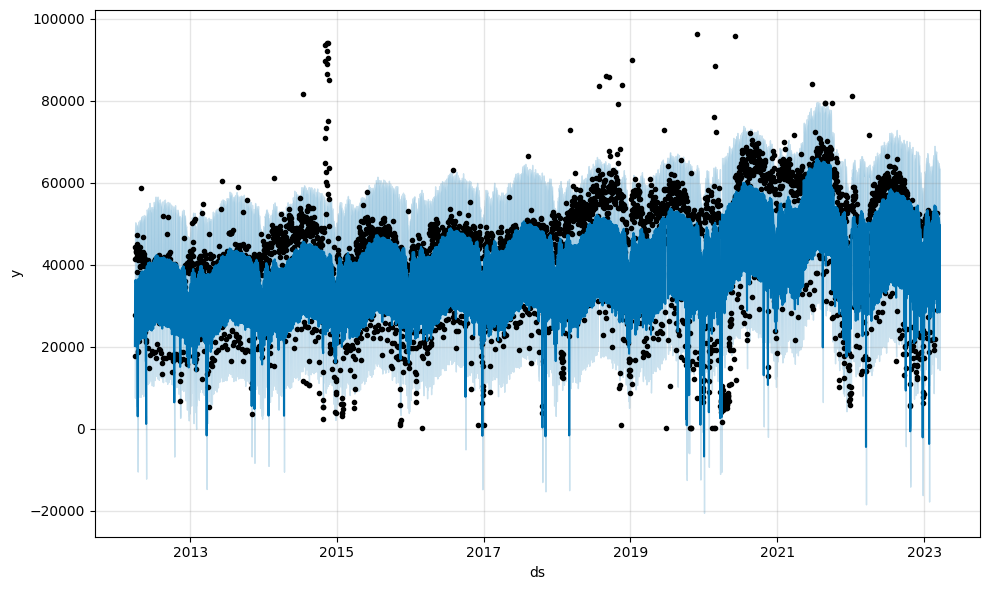

In [27]:
df_prophet=df_f_train.copy()
prop=Prophet(changepoint_prior_scale=0.007,seasonality_prior_scale= 0.01,holidays=holidays,holidays_prior_scale=50,seasonality_mode='multiplicative',changepoint_range=0.9)
prop.fit(df_prophet)
future=prop.make_future_dataframe(periods=len(df_f_test))
forecast=prop.predict(future)
fig1=prop.plot(forecast)

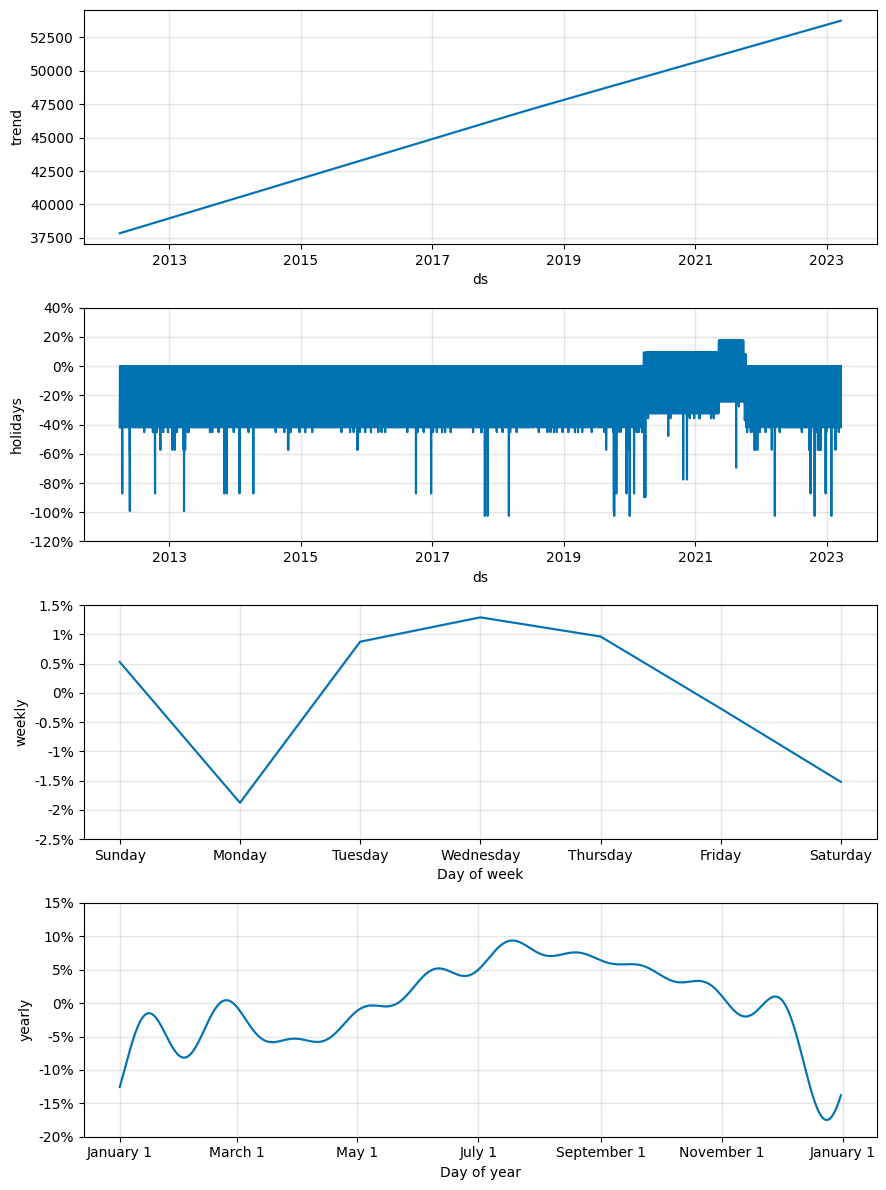

In [28]:
fig2=prop.plot_components(forecast)

In [29]:
def rmse(y, y_hat):
    return np.sqrt(np.mean(np.square(y - y_hat)))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [30]:
pred=forecast.iloc[-15:,-1:].reset_index(drop=True)
df_f_test=df_f_test.reset_index(drop=True)


In [31]:
df_f_test

,ds,y
0,2023-03-06,49340.0
1,2023-03-07,51722.0
2,2023-03-08,23248.0
3,2023-03-09,49084.0
4,2023-03-10,50681.0
5,2023-03-11,49148.0
6,2023-03-12,23777.0
7,2023-03-13,47226.0
8,2023-03-14,49016.0
9,2023-03-15,51578.0


In [32]:
for i in range(len(pred)):
    print(int(df_f_test.y[i]),int(pred.yhat[i]),i)

49340 51401 0
51722 52644 1
23248 28354 2
49084 52239 3
50681 51371 4
49148 50506 5
23777 28925 6
47226 49998 7
49016 51355 8
51578 51479 9
51647 51227 10
48679 50512 11
51074 49806 12
23838 28370 13
48517 49606 14


In [33]:
#for i in range(len(pred)):
#    pred["yhat"][i]-=4000

In [34]:
print("RMSE Score",rmse(df_f_test.y,pred.yhat))
print("MAPE Score",mean_absolute_percentage_error(df_f_test.y,pred.yhat))

RMSE Score 2708.1624938421937
MAPE Score 6.619387197027553


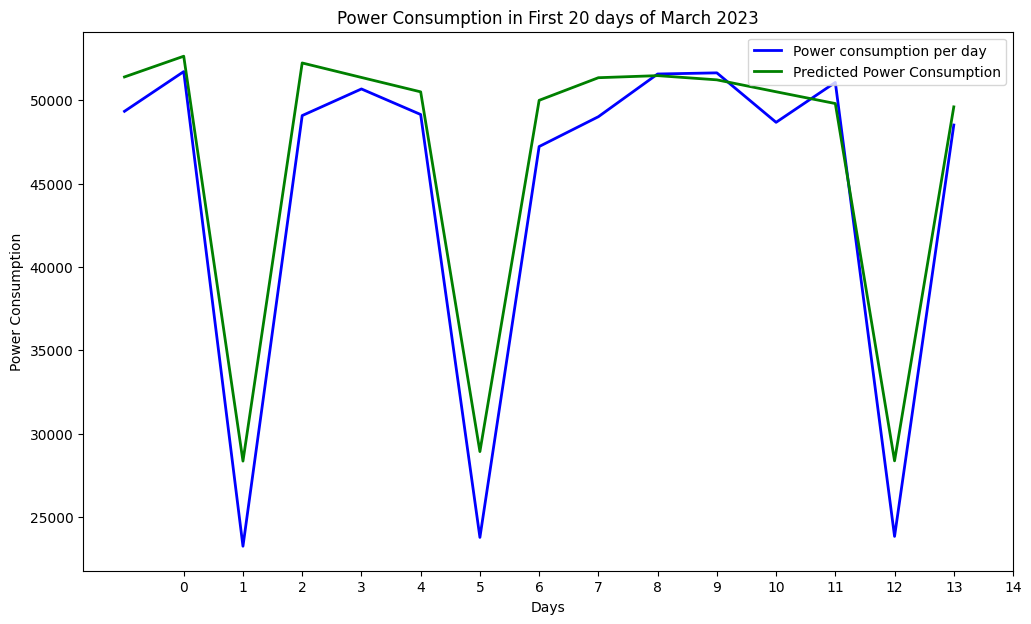

In [35]:
total1=df_f_test.y
total2=pred.yhat
#total1=df_f_train.y[-60:].reset_index(drop=True)
#total2=forecast.yhat[-60:].reset_index(drop=True)
xticks=np.arange(0,15,1)
x=np.arange(1,len(total1)+1)
fig,ax=plt.subplots()
plt.plot(total1,c="b",linewidth=2)
plt.plot(total2,c="g",linewidth=2)
ax.set_xticks(x,xticks)
#ax.spines[['left', 'bottom']].set_position('zero')
fig.set_size_inches(12, 7)
plt.legend(["Power consumption per day","Predicted Power Consumption"],loc="upper right")
ax.set_xlabel("Days")
ax.set_ylabel("Power Consumption")
ax.set_title("Power Consumption in First 20 days of March 2023")
plt.show()